#### TOP 10 PIZZA restaurants DELIVEROO

In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Step 1: Connect to the SQLite database
db_path = r"..\databases\deliveroo.db"
connection = sqlite3.connect(db_path)



In [ ]:
# Step 2: Query the top pizza restaurants
query = """
SELECT DISTINCT name AS restaurant_name, category, address, rating, latitude, longitude
FROM restaurants
WHERE category LIKE '%pizza%' or name LIKE '%pizza%'
ORDER BY rating DESC
LIMIT 10;
"""
query_pizza = """
SELECT DISTINCT restaurants.name AS restaurant_name, category, address, rating, latitude, longitude
FROM restaurants
JOIN categories ON restaurants.id = categories.restaurant_id
WHERE categories.name LIKE '%pizz%'
ORDER BY restaurants.rating DESC
LIMIT 10;
"""

In [42]:
# Step 3: Create a DataFrame
top_10_df = pd.read_sql_query(query, connection)
top_10pizza_df = pd.read_sql_query(query_pizza, connection)
# Close the connection to the database (this may help avoiding database locks)
connection.close()

In [43]:
# Step 4: Add a star rating column
top_10_df["Star Rating"] = top_10_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x))
)
top_10pizza_df["Star Rating"] = top_10pizza_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))
#print(top_pizza_df.head())

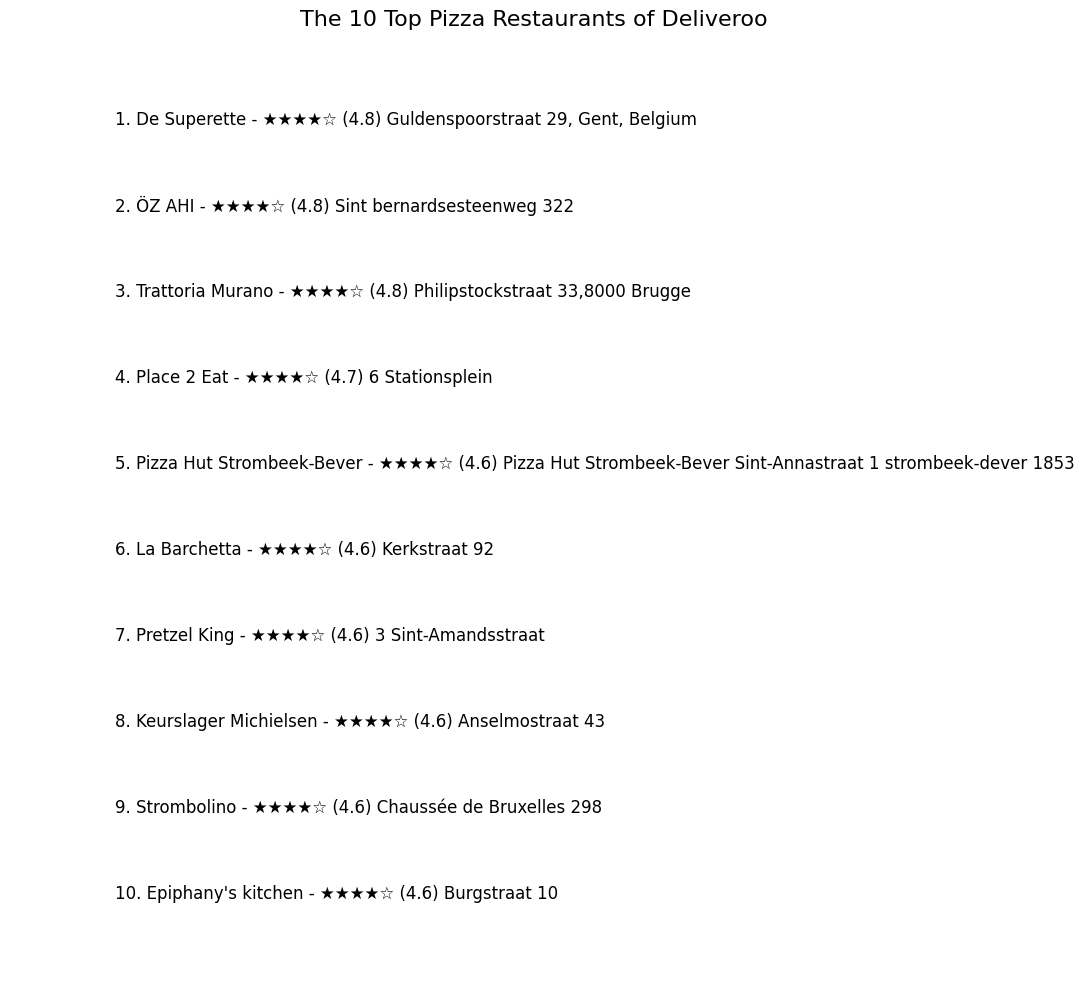

In [44]:
# Step 5: Generate the visualization
df = top_10pizza_df

fig, ax = plt.subplots(figsize=(12, len(df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in df.iterrows():
    plt.text(
        0.1,
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['restaurant_name']} - {row['Star Rating']} ({row['rating']:.1f}) {row['address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Deliveroo", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  

# Display the chart
plt.tight_layout()
plt.show()


#### TOP 10 PIZZA restaurants TAKEAWAY

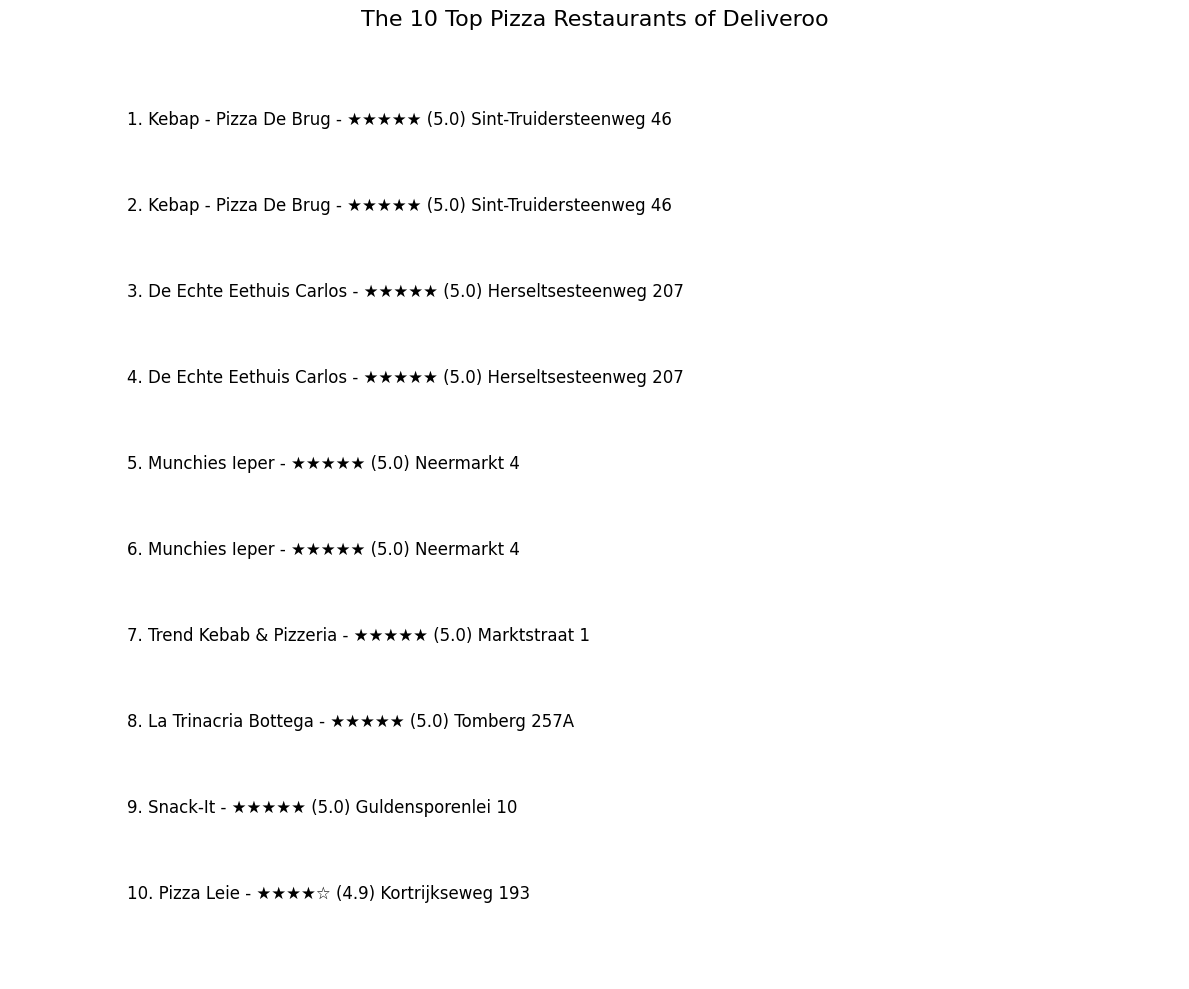

In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
db_path = r"..\databases\takeaway.db"
connection = sqlite3.connect(db_path)

# Step 2: Query the top pizza restaurants

query_pizza = """
SELECT DISTINCT restaurants.name AS restaurant_name, categories.name, address, ratings, latitude, longitude
FROM restaurants
JOIN categories ON restaurants.primarySlug = categories.restaurant_id
WHERE categories.name LIKE '%pizz%'
ORDER BY restaurants.ratings DESC
LIMIT 10;
"""

# Step 3: Create a DataFrame
top_10pizza_df = pd.read_sql_query(query_pizza, connection)
# Close the connection to the database (this may help avoiding database locks)
connection.close()

# Step 4: Add a star rating column

top_10pizza_df["Star Rating"] = top_10pizza_df["ratings"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))
#print(top_pizza_df.head())

# Step 5: Generate the visualization
df = top_10pizza_df

fig, ax = plt.subplots(figsize=(12, len(df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in df.iterrows():
    plt.text(
        0.1,
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['restaurant_name']} - {row['Star Rating']} ({row['ratings']:.1f}) {row['address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Deliveroo", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  

# Display the chart
plt.tight_layout()
plt.show()
